In [48]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [49]:
# Load the dataset
df = pd.read_csv('dataset.csv')

# Display initial dataset information
print("First 5 rows of the dataset:")
print(df.head(5))
print("\nInitial Data Overview:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe())

First 5 rows of the dataset:
   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          

In [50]:
# Example: selected_genres = ['rock', 'rap', 'jazz', 'latin', 'country', 'pop']
selected_genres = ['rock','rap','jazz','latin','country','pop']  # <- Enter your genres here

# Filter for the selected genres
df = df[df['track_genre'].isin(selected_genres)]

# Limit the dataset to a sample of 100 tracks per selected genre
df = df.groupby('track_genre').apply(lambda x: x.sample(100, random_state=42)).reset_index(drop=True)

<ipython-input-50-9242d35a2946>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('track_genre').apply(lambda x: x.sample(100, random_state=42)).reset_index(drop=True)


In [51]:
# I deleted some columns that I feel like didn't matter whether was rap or pop.
df = df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
         'instrumentalness', 'valence', 'tempo', 'explicit','duration_ms','valence','liveness', 'track_genre']]

# Drop any rows with missing values
df.dropna(inplace=True)

# Convert 'track_genre' to numerical values (Label Encoding)
label_encoder = LabelEncoder()
df['track_genre'] = label_encoder.fit_transform(df['track_genre'])

# Convert 'explicit' to binary 1/0
df['explicit'] = df['explicit'].astype(int)

# Show class distribution for genres after filtering and sampling
print("\nSampled Genre Distribution:")
print(df['track_genre'].value_counts())


Sampled Genre Distribution:
track_genre
0    100
1    100
2    100
3    100
4    100
Name: count, dtype: int64


<ipython-input-51-916101166f7f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
<ipython-input-51-916101166f7f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['track_genre'] = label_encoder.fit_transform(df['track_genre'])
<ipython-input-51-916101166f7f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

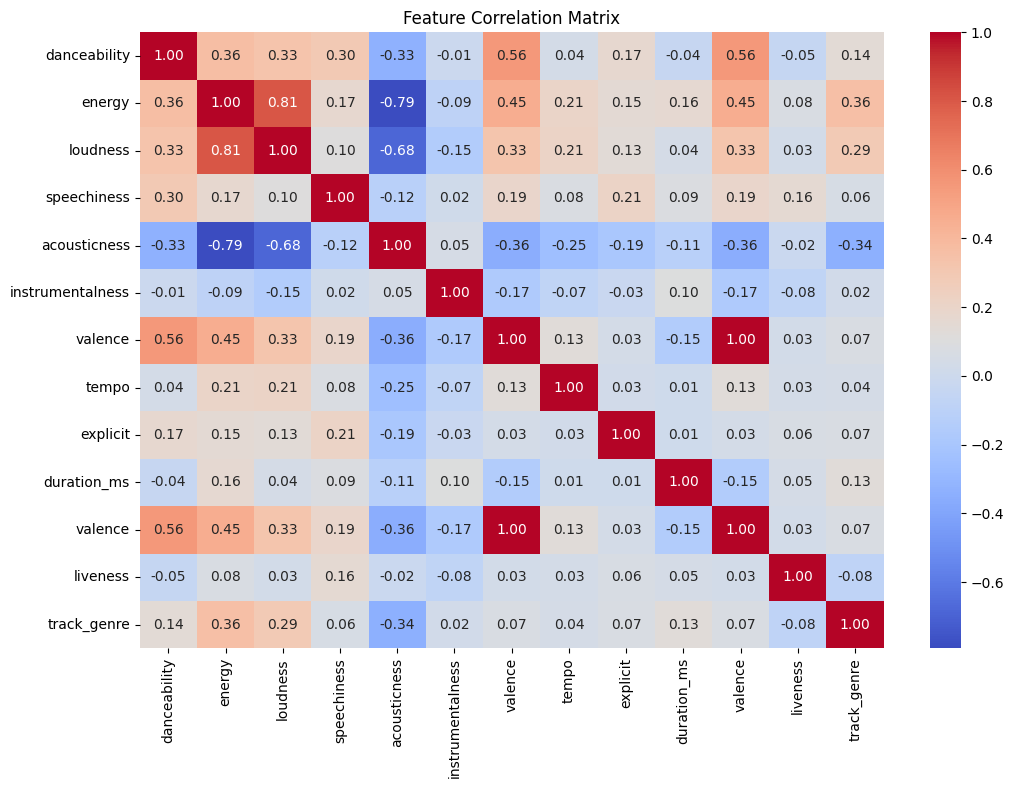

In [52]:
# Heatmap Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [61]:
# Example: remove_features = ['danceability', 'liveness', 'speechiness', 'instrumentalness', 'duration_ms']
remove_features = ['valence','danceability',]  # <- Enter  features to remove here

# Drop the selected features
df.drop(columns=remove_features, inplace=True)

In [62]:
# Feature and target selection
X = df.drop(columns=['track_genre'])
y = df['track_genre']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
# 1. Support Vector Machine (SVM)
print("\nSupport Vector Machine (SVM) Results:")
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


Support Vector Machine (SVM) Results:
SVM Accuracy: 0.38666666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.28      0.34        39
           1       0.58      0.65      0.61        23
           2       0.31      0.38      0.34        26
           3       0.31      0.29      0.30        31
           4       0.35      0.42      0.38        31

    accuracy                           0.39       150
   macro avg       0.39      0.41      0.40       150
weighted avg       0.39      0.39      0.38       150

Confusion Matrix:
 [[11  6  3  6 13]
 [ 6 15  0  2  0]
 [ 3  2 10  6  5]
 [ 3  2 11  9  6]
 [ 3  1  8  6 13]]


In [64]:
# 2. K-Nearest Neighbors (KNN)
print("\nK-Nearest Neighbors (KNN) Results:")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


K-Nearest Neighbors (KNN) Results:
KNN Accuracy: 0.43333333333333335
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.56      0.55        39
           1       0.59      0.57      0.58        23
           2       0.37      0.54      0.44        26
           3       0.24      0.23      0.23        31
           4       0.45      0.29      0.35        31

    accuracy                           0.43       150
   macro avg       0.44      0.44      0.43       150
weighted avg       0.44      0.43      0.43       150

Confusion Matrix:
 [[22  3  2  6  6]
 [ 6 13  0  3  1]
 [ 4  1 14  5  2]
 [ 5  4 13  7  2]
 [ 4  1  9  8  9]]


In [65]:
# 3. Random Forest had the highest accuracy as compared to the rest.
print("\nRandom Forest Results:")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Results:
Random Forest Accuracy: 0.4666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.41      0.50        39
           1       0.59      0.74      0.65        23
           2       0.45      0.54      0.49        26
           3       0.29      0.26      0.27        31
           4       0.41      0.48      0.44        31

    accuracy                           0.47       150
   macro avg       0.47      0.49      0.47       150
weighted avg       0.48      0.47      0.46       150

Confusion Matrix:
 [[16  6  2  3 12]
 [ 1 17  0  4  1]
 [ 2  0 14  7  3]
 [ 4  4  9  8  6]
 [ 2  2  6  6 15]]


I experimented with various different types of combinations and my general conclusion is that the Random forest ML algorithm is the most accurate in this dataset.

I experimented with all the genres, played around with deleting some of the genres/cleaning them.

I tried removing two genres that had high correlations to one another and testing various other types of combinations. Here are some photos of my results.

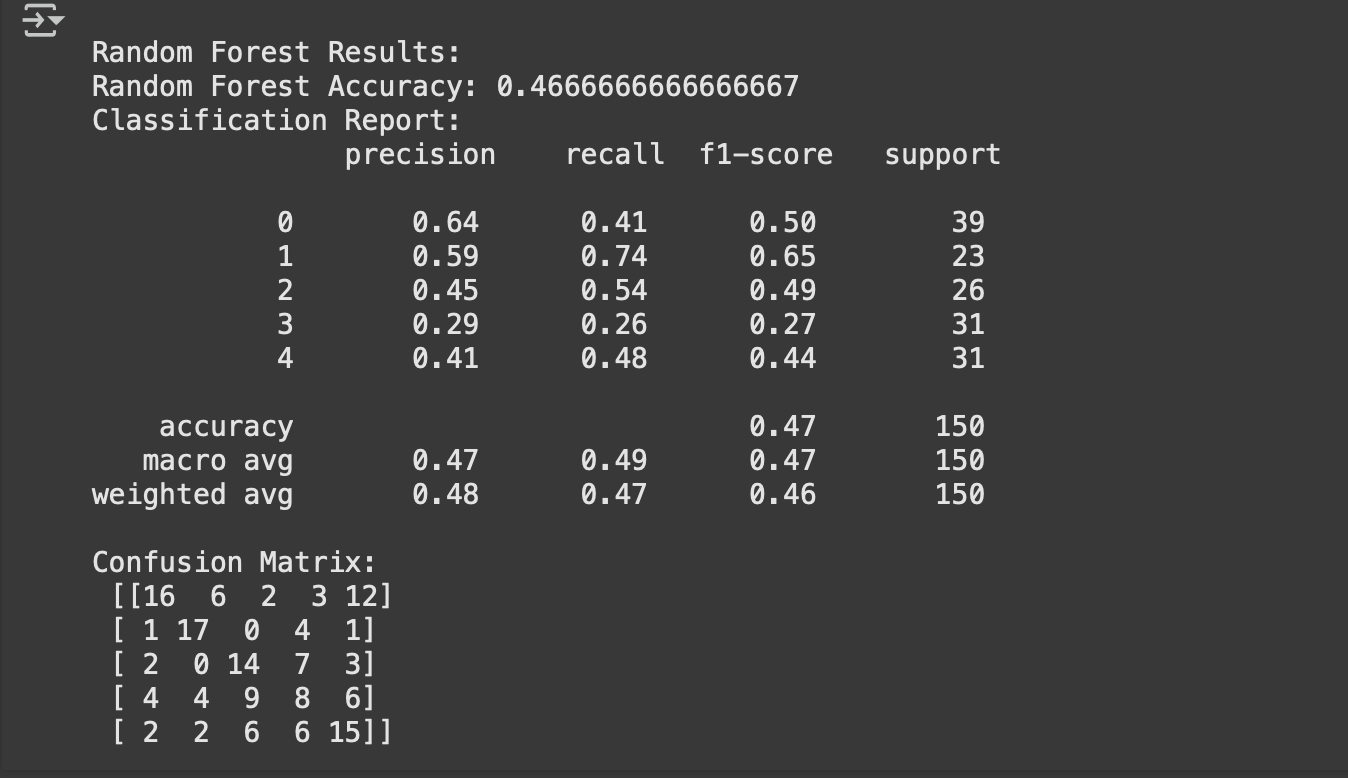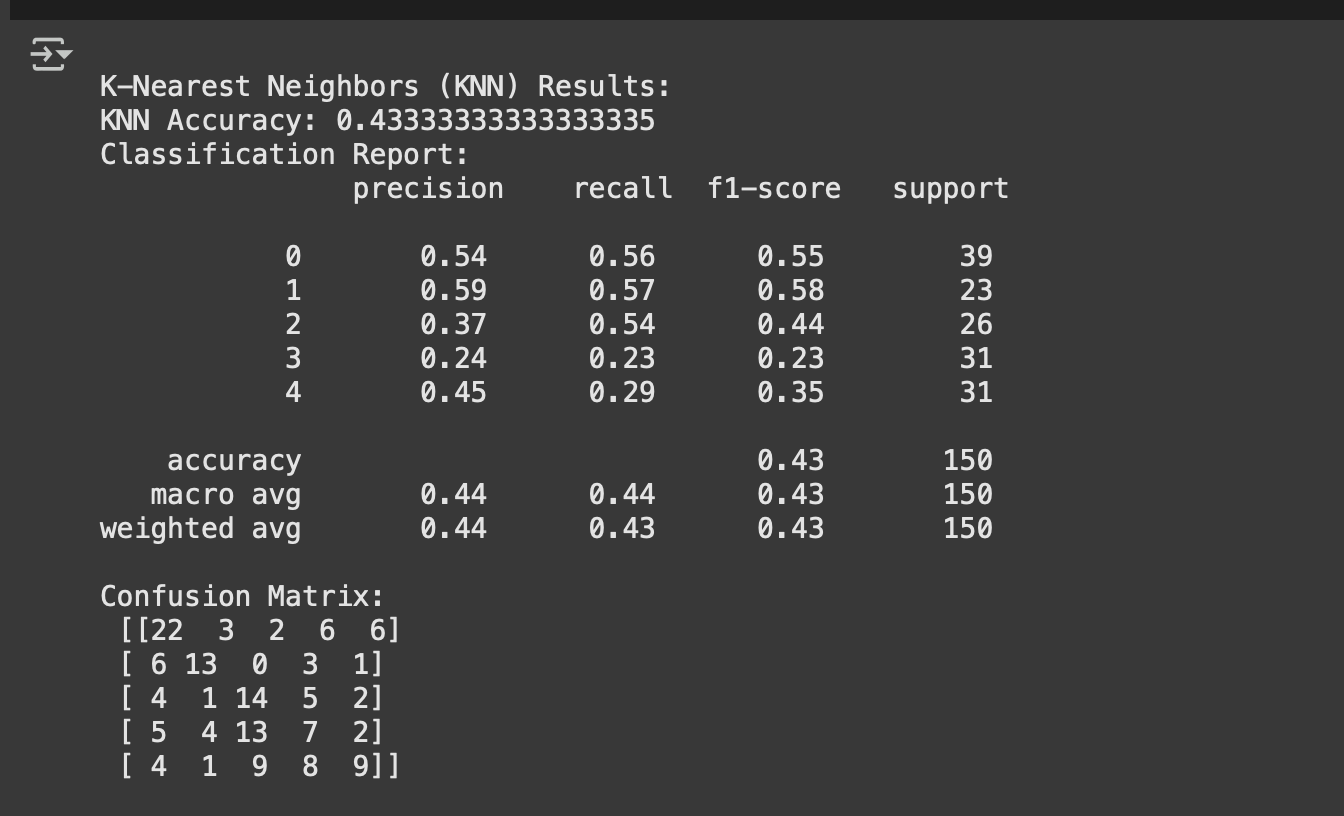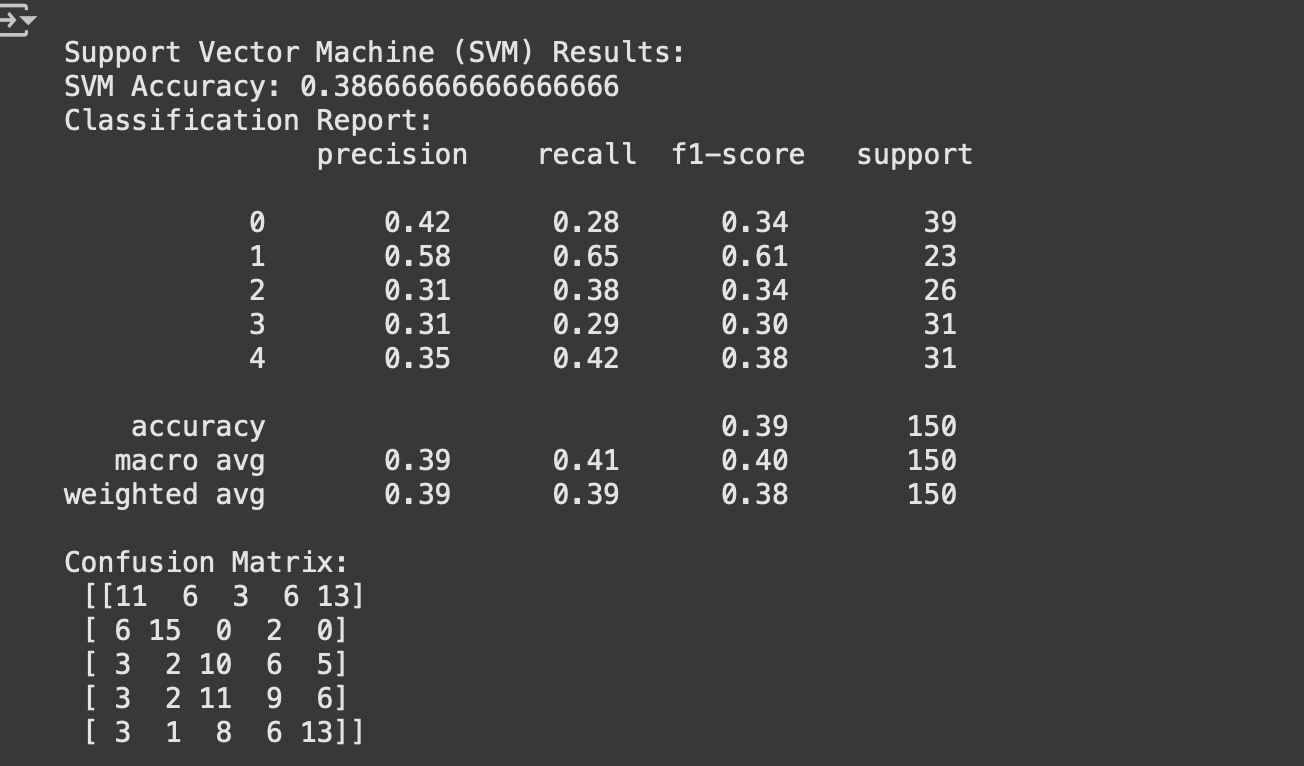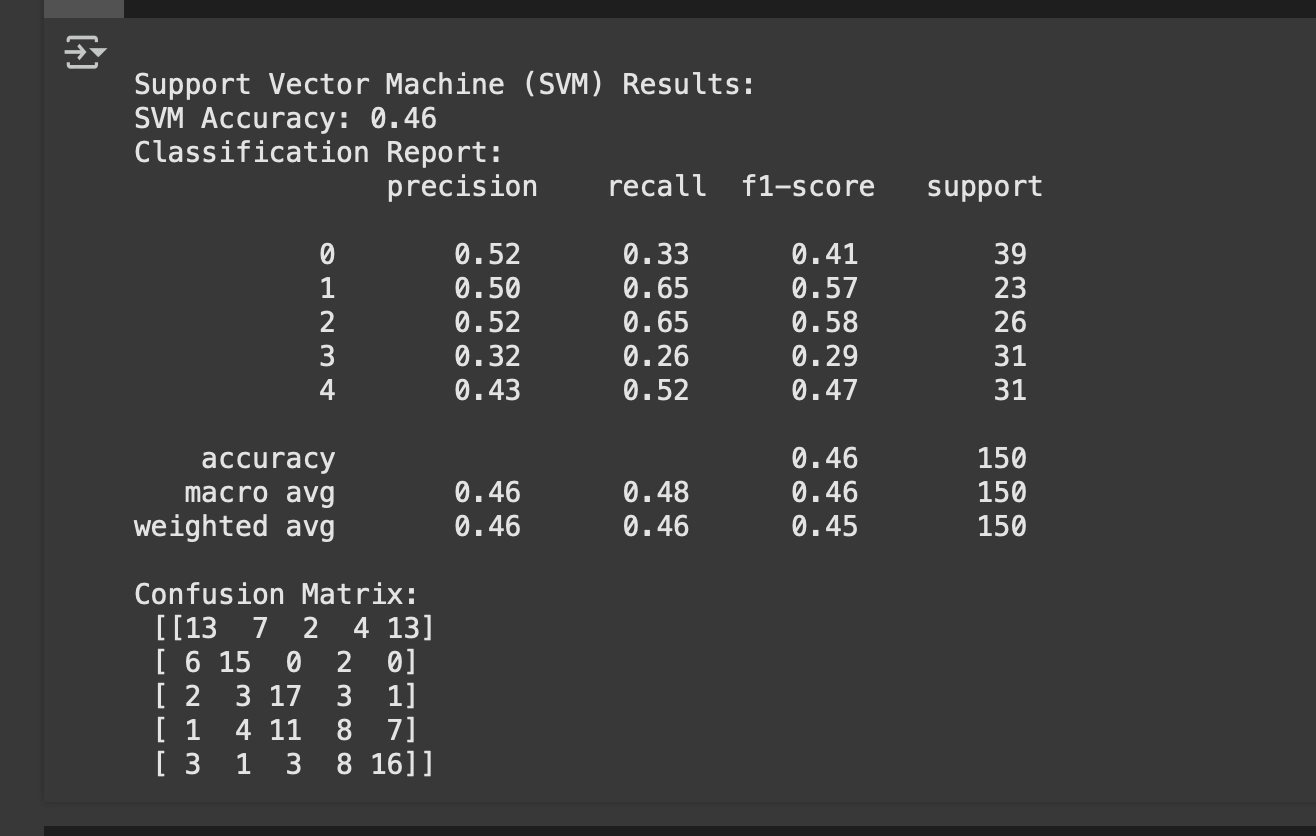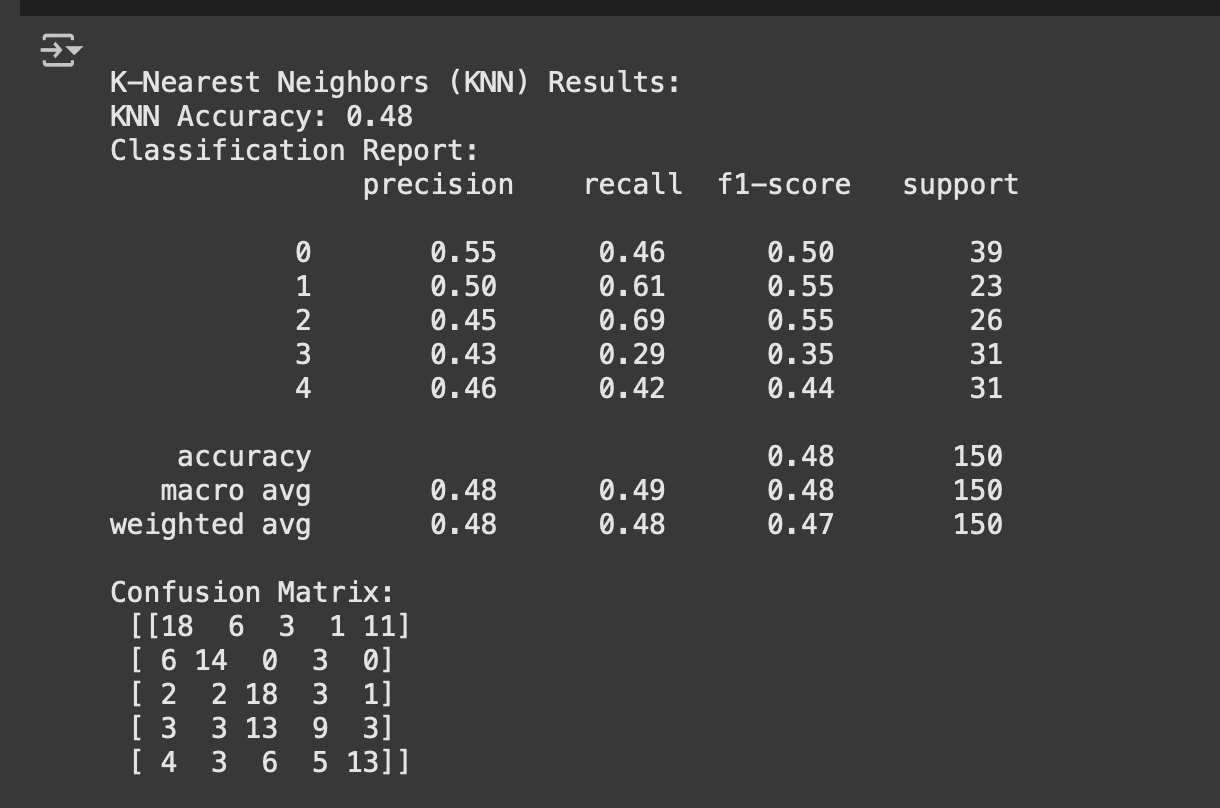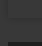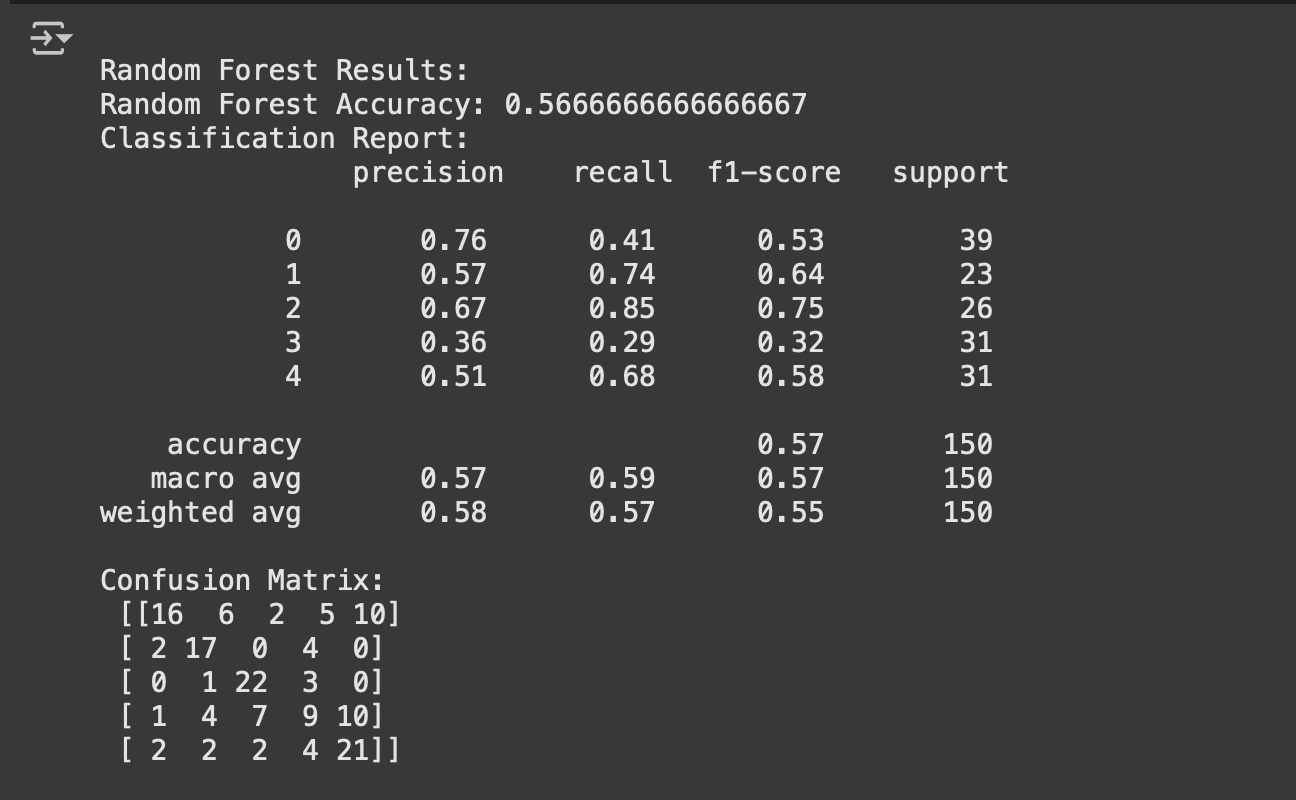


